### Sales Analysis

In [2]:
import pandas as pd
import os 

### Merge all files

In [3]:
files = [file for file in os.listdir("Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)
    


### Read in all data-frame



In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

### Drop rows of NaN

In [5]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

# Drop rows with missing values
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18636,NaN,NaN,NaN,NaN,NaN,NaN
19546,NaN,NaN,NaN,NaN,NaN,NaN
20972,NaN,NaN,NaN,NaN,NaN,NaN
21009,NaN,NaN,NaN,NaN,NaN,NaN
21443,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Finding 'Or' and delete it

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

### Column to correct type

In [7]:
# Make a safe copy to avoid SettingWithCopyWarning
all_data = all_data.copy()

# Convert to numeric, safely handling bad data
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Drop rows with NaN values
all_data.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)



### Argument data with additional columns 

### Task 2: Add Month Column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a sales column

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add city column

In [10]:

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


##### 01. What is the best month of Sales? How much was earned that month?

In [11]:
monthly_sales = all_data.groupby('Month')['Sales'].sum()
print(monthly_sales.sort_values(ascending=False))  # Best month on top

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64


range(1, 13)


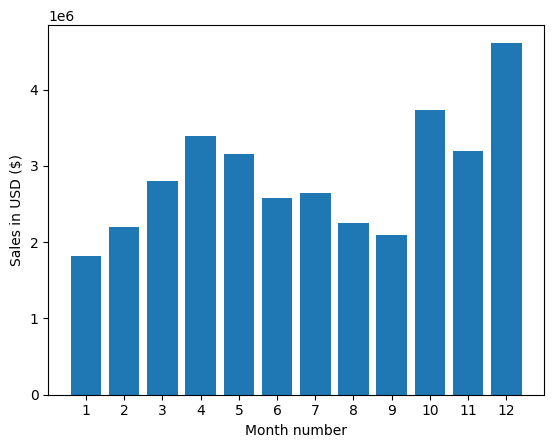

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


#### Question 2: What city sold the most product?

In [13]:
city_sales = all_data.groupby('City')['Quantity Ordered'].sum()
print(city_sales.sort_values(ascending=False))

City
San Francisco  (CA)    50239
Los Angeles  (CA)      33289
New York City  (NY)    27932
Boston  (MA)           22528
Dallas  (TX)           16730
Atlanta  (GA)          16602
Seattle  (WA)          16553
Portland  (OR)         11303
Austin  (TX)           11153
Portland  (ME)          2750
Name: Quantity Ordered, dtype: int64


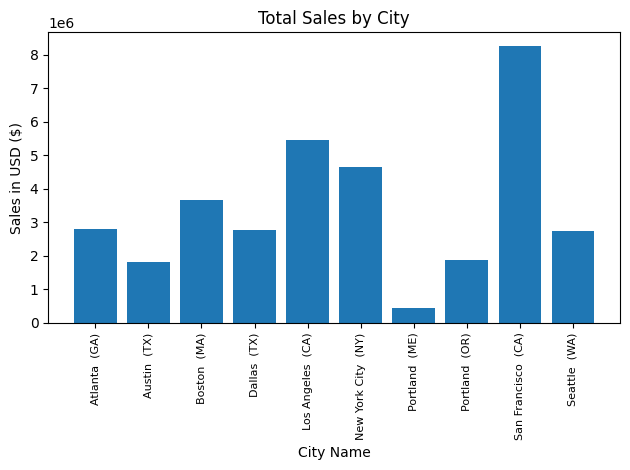

In [14]:
import matplotlib.pyplot as plt

# Group by city and sum the sales
city_sales = all_data.groupby('City')['Sales'].sum()

# Get the city names (x-axis labels)
keys = city_sales.index

# Plot
plt.bar(keys, city_sales.values)  # Pass values directly for the y-axis
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.xticks(rotation='vertical', fontsize=8)
plt.title('Total Sales by City')
plt.tight_layout()
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
# Convert 'Order Date' to datetime format safely (handles mixed formats)
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

# Drop rows with invalid or missing dates
all_data.dropna(subset=['Order Date'], inplace=True)

# Extract hour and minute
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

# Add a count column
all_data['Count'] = 1

# Optional: check the result
all_data.head()


C:\Users\Neeraj\AppData\Local\Temp\ipykernel_9756\1102682115.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


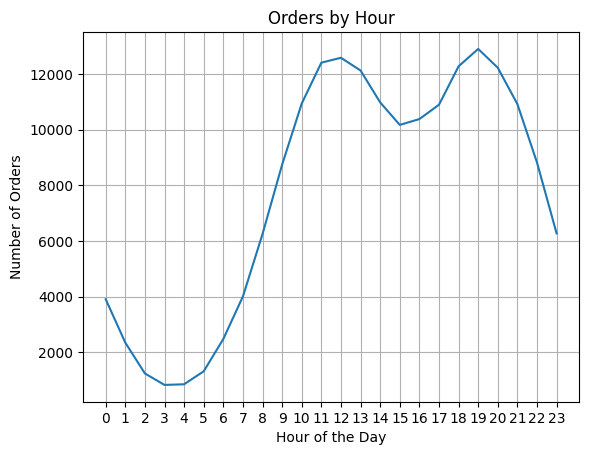

In [16]:
import matplotlib.pyplot as plt

# Get sorted unique hours
keys = sorted(all_data['Hour'].unique())

# Group and plot
plt.plot(keys, all_data.groupby('Hour').count()['Count'])

# Label x-axis ticks
plt.xticks(keys)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour')
plt.grid(True)
plt.show()


#### Question 4: What products are most often sold together?

In [17]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Load data
all_data = pd.read_csv('all_data.csv')  # replace with your file name

all_data = all_data[all_data['Product'] != 'Product']

# Filter out rows with NaNs and keep orders with duplicate Order IDs
dupe_orders = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

# Group products by 'Order ID'
dupe_orders['Grouped'] = dupe_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicates and any rows with NaNs in 'Grouped'
dupe_orders = dupe_orders[['Order ID', 'Grouped']].drop_duplicates()
dupe_orders = dupe_orders.dropna(subset=['Grouped'])  # 🔥 Fix applied here

# Count product combinations
count = Counter()

for row in dupe_orders['Grouped']:
    products = row.split(',')
    count.update(Counter(combinations(products, 2)))  # Count pairs

# Display top 10
for combo, freq in count.most_common(10):
    print(f"{combo}: {freq} times")


('iPhone', 'Lightning Charging Cable'): 1005 times
('Google Phone', 'USB-C Charging Cable'): 987 times
('iPhone', 'Wired Headphones'): 447 times
('Google Phone', 'Wired Headphones'): 414 times
('Vareebadd Phone', 'USB-C Charging Cable'): 361 times
('iPhone', 'Apple Airpods Headphones'): 360 times
('Google Phone', 'Bose SoundSport Headphones'): 220 times
('USB-C Charging Cable', 'Wired Headphones'): 160 times
('Vareebadd Phone', 'Wired Headphones'): 143 times
('Lightning Charging Cable', 'Wired Headphones'): 92 times


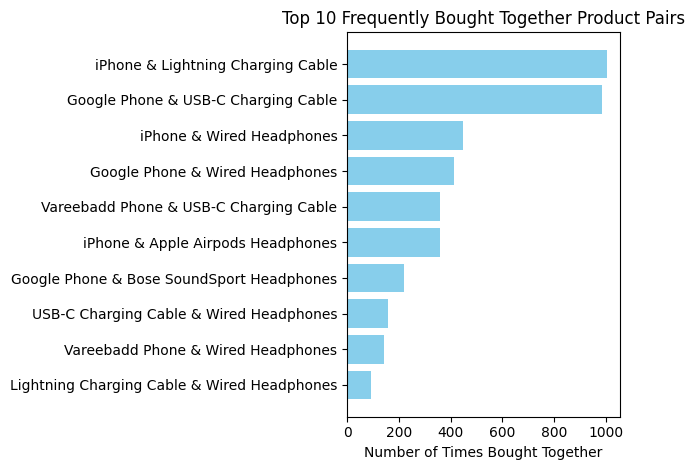

In [ ]:
import matplotlib.pyplot as plt

# Get top 10 product combinations and their counts
top_10_combos = count.most_common(10)

# Unpack the combos and frequencies
combos = [' & '.join(combo) for combo, freq in top_10_combos]
frequencies = [freq for combo, freq in top_10_combos]

# Plotting
plt.barh(combos, frequencies, color='skyblue')
plt.xlabel('Number of Times Bought Together')
plt.title('Top 10 Frequently Bought Together Product Pairs')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


#### 5. What product sold the most? Why do you think it sold the most?

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


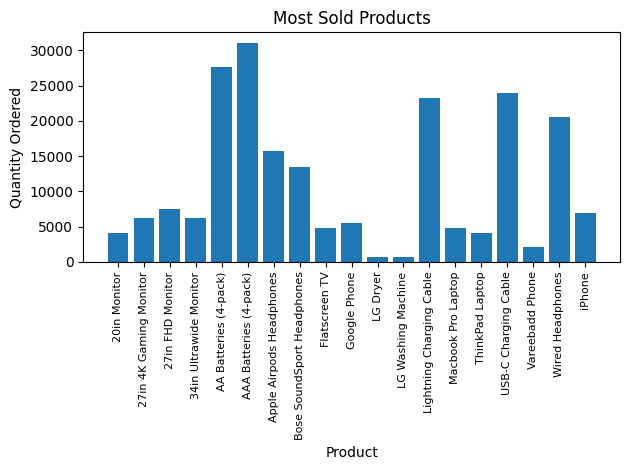

In [ ]:
# Strip spaces from column names (just in case)
all_data.columns = all_data.columns.str.strip()

# Convert 'Quantity Ordered' to numeric (force errors to NaN), then drop those rows
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data.dropna(subset=['Quantity Ordered'], inplace=True)

# Group by product and sum quantity ordered
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Plot
keys = quantity_ordered.index
plt.bar(keys, quantity_ordered)
plt.xticks(rotation='vertical', fontsize=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Most Sold Products')
plt.tight_layout()
plt.show()

In [29]:
# Convert to numeric, force errors to NaN
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Drop rows where conversion failed
all_data.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)



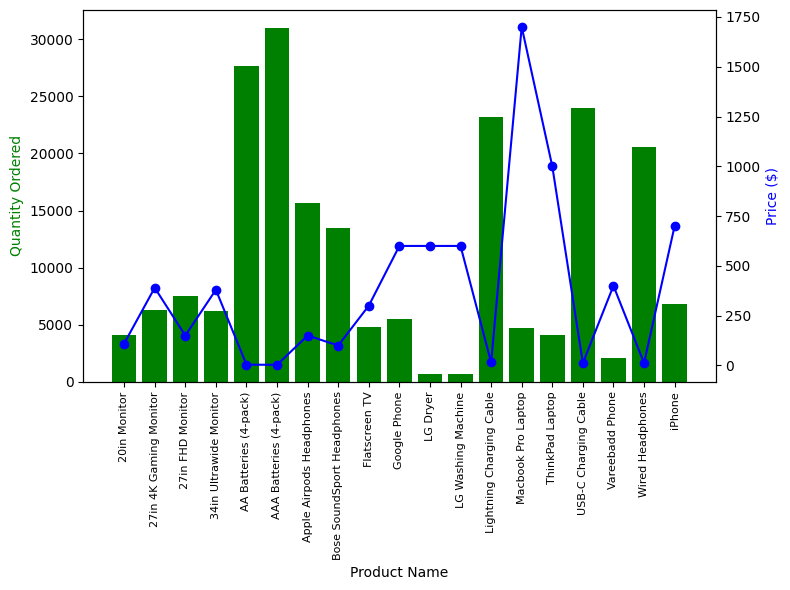

In [40]:
# Group and aggregate
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
prices = product_group['Price Each'].mean()
keys = quantity_ordered.index  # Product names

# Plot
fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b', marker='o')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Fix tick labels
ax1.set_xticks(range(len(keys)))
ax1.set_xticklabels(keys, rotation='vertical', size=8)

plt.tight_layout()
plt.show()